# __Project Unsupervised Learning__

---

The data used for this excercise will be from __Colleges__ in the USA, variables description are next:

* __Private__ A factor with levels No and Yes indicating private or public university
* __Apps__ Number of applications received
* __Accept__ Number of applications accepted
* __Enroll__ Number of new students enrolled
* __Top10perc__ Pct. new students from top 10% of H.S. class
* __Top25perc__ Pct. new students from top 25% of H.S. class
* __F.Undergrad__ Number of fulltime undergraduates
* __P.Undergrad__ Number of parttime undergraduates
* __Outstate__ Out-of-state tuition
* __Room.Board__ Room and board costs
* __Books__ Estimated book costs
* __Personal__ Estimated personal spending
* __PhD__ Pct. of faculty with Ph.D.’s
* __Terminal__ Pct. of faculty with terminal degree
* __S.F.Ratio__ Student/faculty ratio
* __perc.alumni__ Pct. alumni who donate
* __Expend__ Instructional expenditure per student
* __Grad.Rate__ Graduation rate

In [47]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
# Global Plots Params
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (22,12)

This attempt will try to classify each college if __is Private or not__, despite that there exist a var that already does this classification, this will only be used to compare the results from attempts to classification; hence, will be dropped from the dataframe and will be stored in a separated variable.

In [52]:
college = pd.read_csv('College_Data.csv')                     # Read data from file
college.rename(columns={'Unnamed: 0':'Name'}, inplace=True)   # Renaming first column
is_private = college['Private'].replace({'Yes':0,'No':1})     # Creating a separate classification variable
college.drop(columns='Private', inplace=True)                 # Droping classification var
college.head()

Name  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
# Encoding names to numeric
college['Name'] = LabelEncoder().fit_transform(college['Name']) 

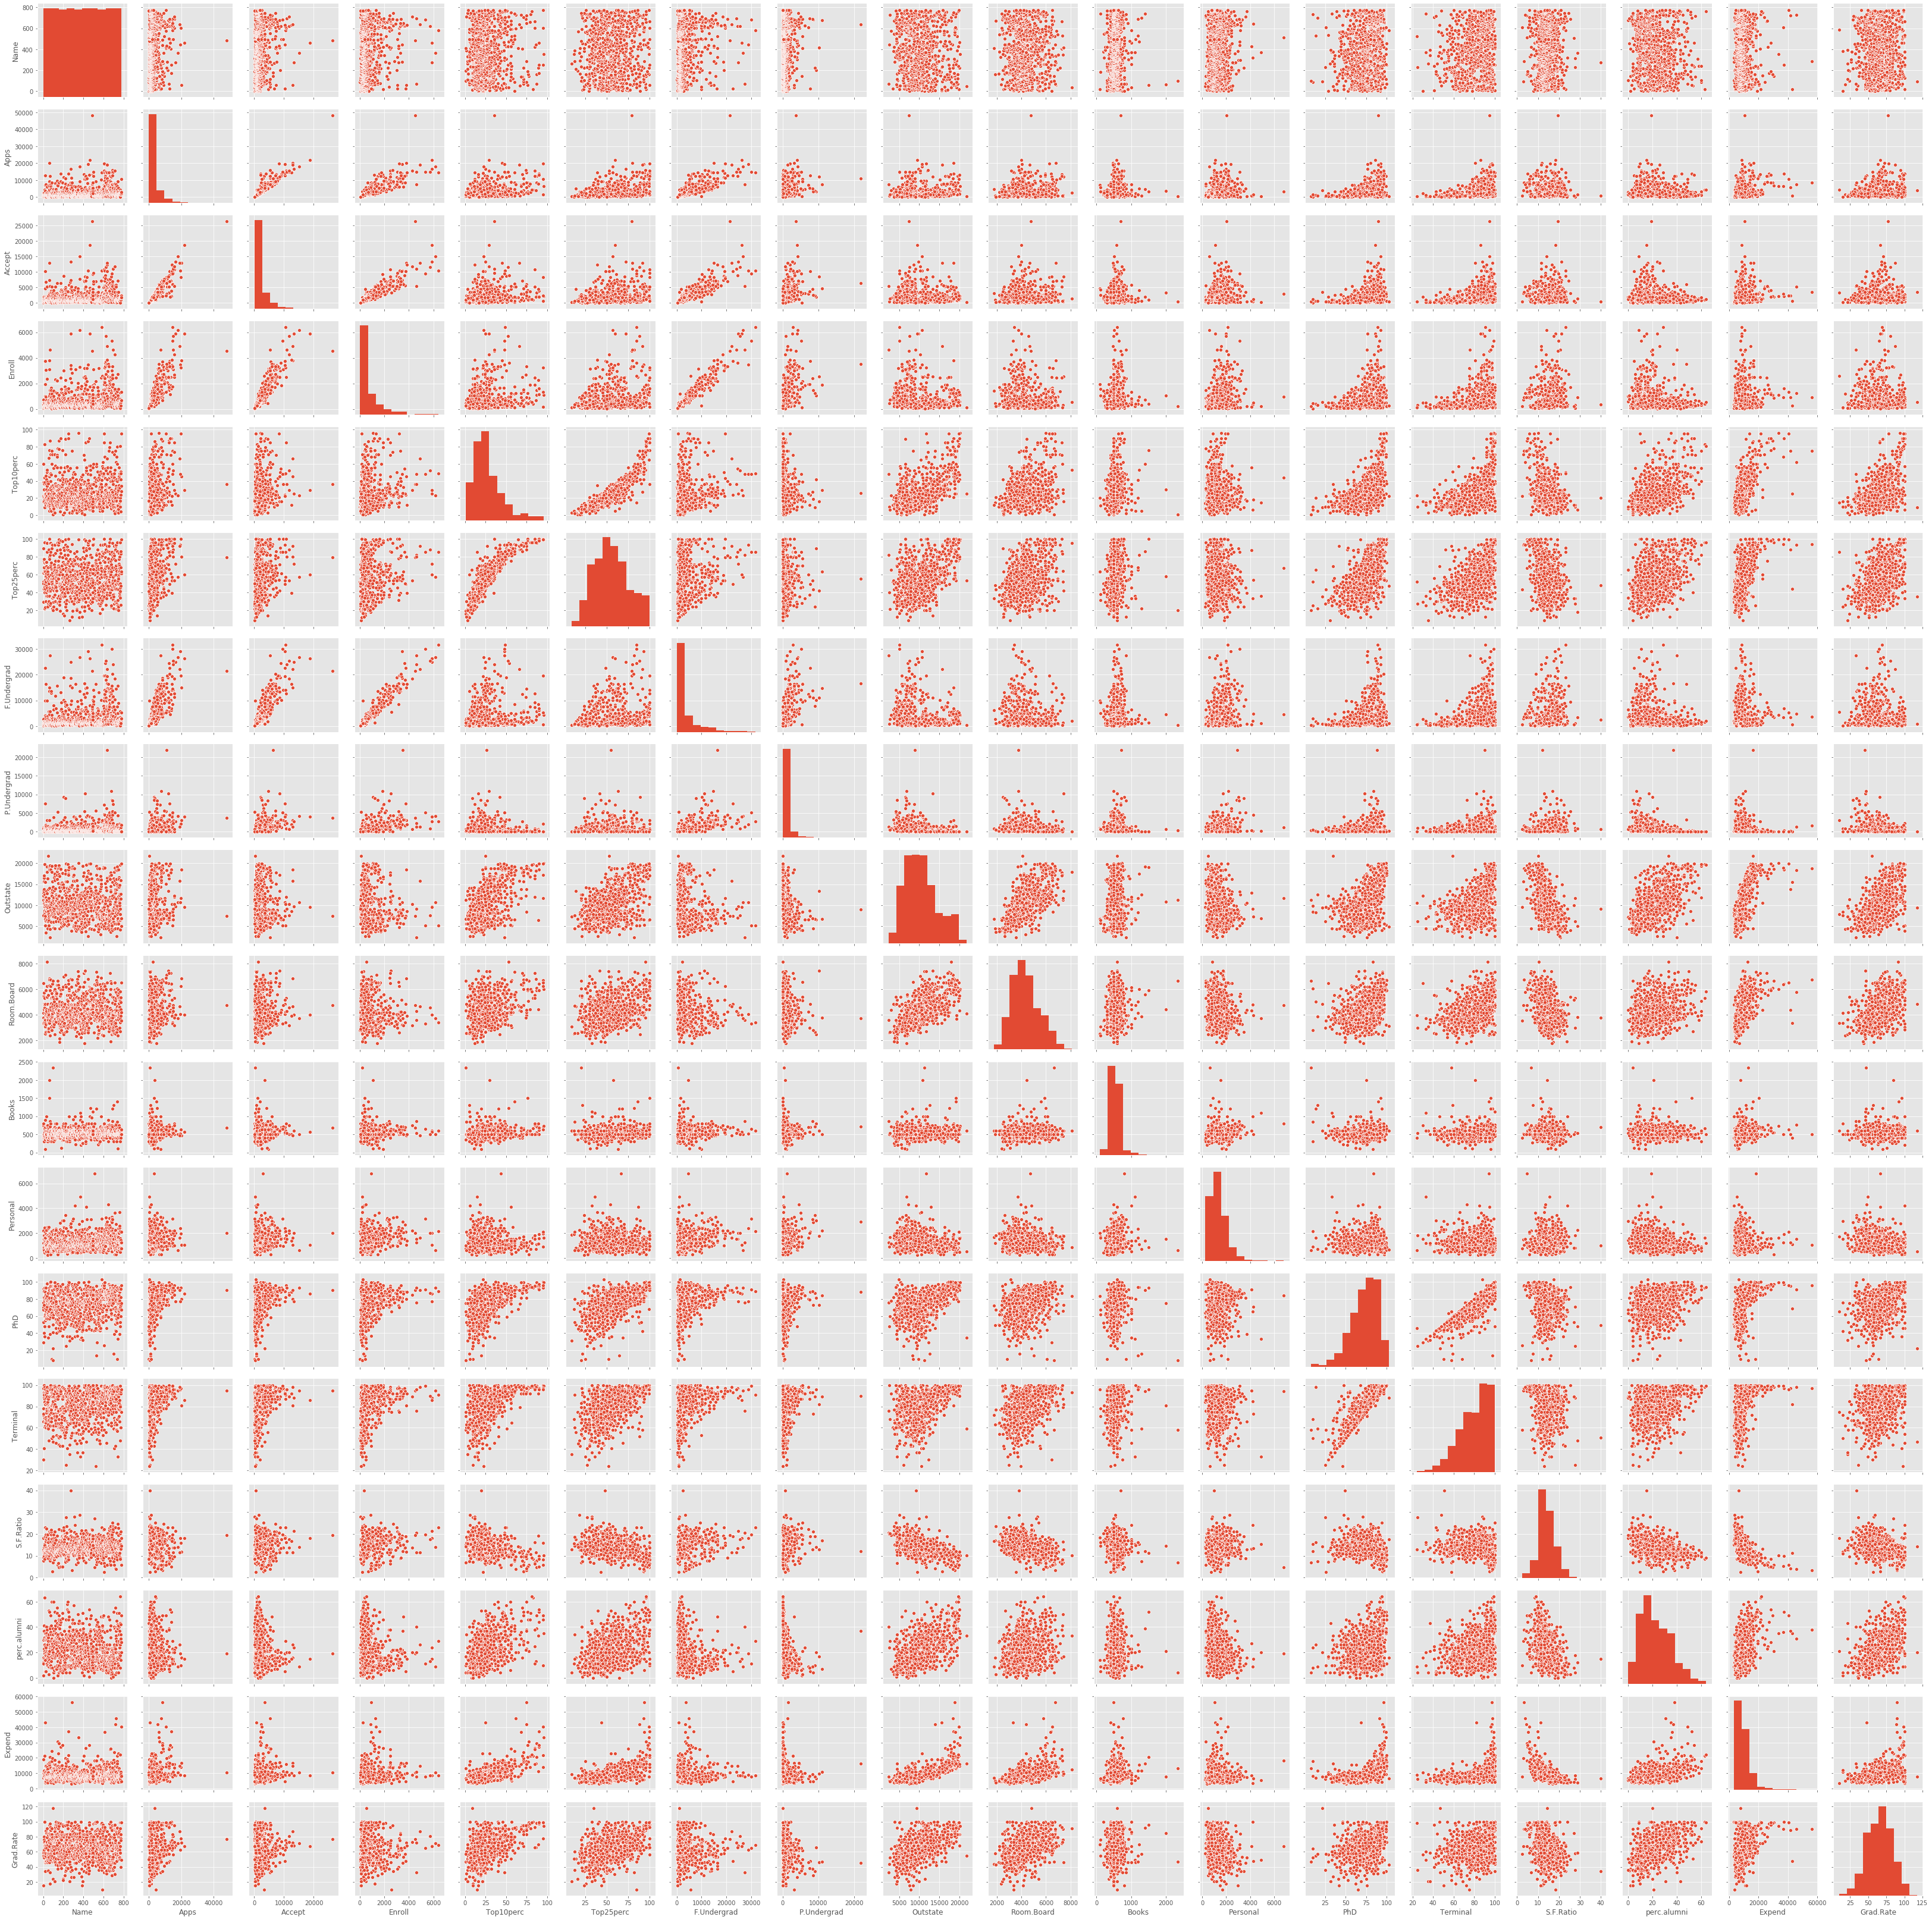

In [12]:
# See relationships between all variables
sns.pairplot(college);

## __Simple Unsupervised Classification__

---

In this first attempt, a simple classification will be made using the KMeans and GaussianMixture algorithms directly on the data.

In [57]:
# Importing KMeans and GaussianMixture algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [62]:
# Creation of a function to Fit the models
def fit_KM_GM(data, clusters=2):
    km_c = KMeans(n_clusters=2).fit(college)
    gm_c = GaussianMixture(n_components=2).fit(college)
    return km_c.labels_, gm_c.predict(college)

In [64]:
# Getting the classification from both models
km_labels, gm_labels = fit_KM_GM(college)

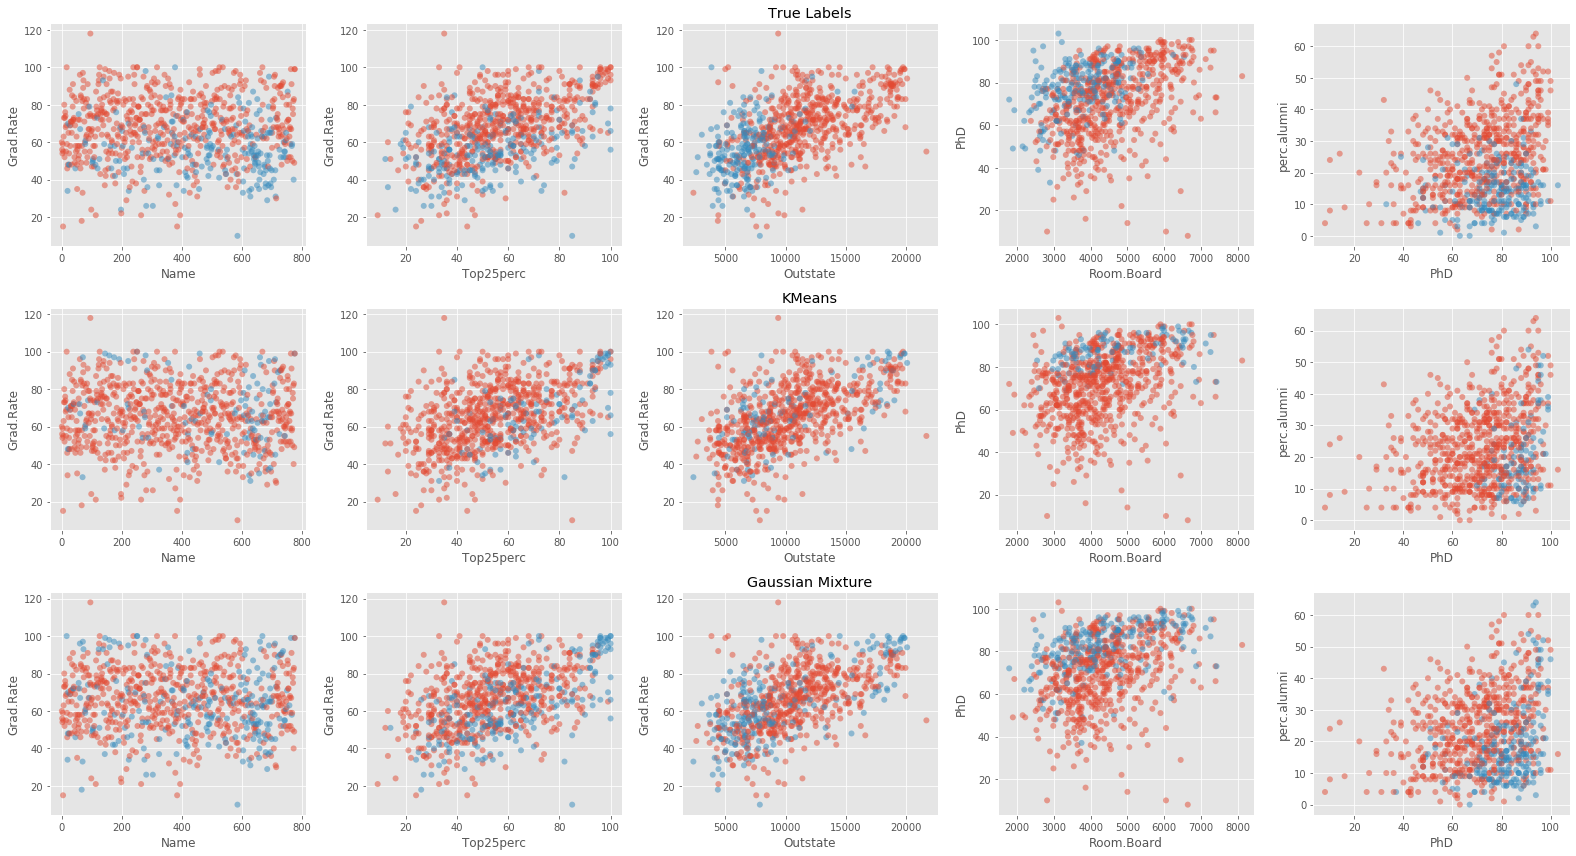

In [65]:
# Ploting some classified relationships from the data to see how each algorith performed
fig, axes = plt.subplots(3,5)

names = [('Name', 'Grad.Rate'), ('Top25perc', 'Grad.Rate'), ('Outstate', 'Grad.Rate'), ('Room.Board', 'PhD'), ('PhD', 'perc.alumni')]

for i in range(5):
    
    sns.scatterplot(x=names[i][0], y=names[i][1], hue=is_private, data=college, legend=False, alpha=0.5, linewidth=0, ax=axes[0,i])
    sns.scatterplot(x=names[i][0], y=names[i][1], hue=km_labels, data=college, alpha=0.5, linewidth=0, legend=False, ax=axes[1,i])
    sns.scatterplot(x=names[i][0], y=names[i][1], hue=gm_labels, data=college, alpha=0.5, linewidth=0, legend=False, ax=axes[2,i])
    
    if i == 2:
        axes[1,i].set_title(f'KMeans')
        axes[0,i].set_title(f'True Labels')
        axes[2,i].set_title(f'Gaussian Mixture')
    
plt.tight_layout();

In [59]:
from sklearn.metrics import accuracy_score

In [120]:
# Function to print the accuracy
def accuracy(true_l, km_l, gm_l):
    km_a = round(accuracy_score(true_l, km_l)*100,2)
    gm_a = round(accuracy_score(true_l, gm_l)*100,2)
    print(f'KMeans Accuracy: {km_a}%\nGaussian Mixture: {gm_a}%')

From the accuracy we can see that the GaussianMixture has a better performance, however it still is a low value.

In [69]:
accuracy(is_private, km_labels, gm_labels)

KMeans Accuracy: 77.86%
Gaussian Mixture: 82.88%


## __PCA__

---

A PCA will be applied to the data to try to obtain a better accuracy.

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
college_pca = pca.fit_transform(college)

In [73]:
# Fiting the PCA data
km_labels_pca, gm_labels_pca = fit_KM_GM(college_pca)

In [106]:
# Function to plot the classifications
def plot_models(data, true_l, km_l, gm_l):
    fig, axes = plt.subplots(1,3, sharey=True, figsize=(22,6))
    
    names = [('True Labels', true_l), ('KMeans', km_l), ('Gaussian Mixture', gm_l)]
    
    for i in range(3):
        sns.scatterplot(x=data[:,0], y=data[:,1], hue=names[i][1], palette='viridis', alpha=0.75, linewidth=0, ax=axes[i])
        axes[i].set_title(names[i][0])
        if i > 0:
            acc = accuracy_score(true_l, names[i][1])
            axes[i].text(data[:,0].min(),data[:,1].max(),f'Accuracy: {round(acc,4)}')

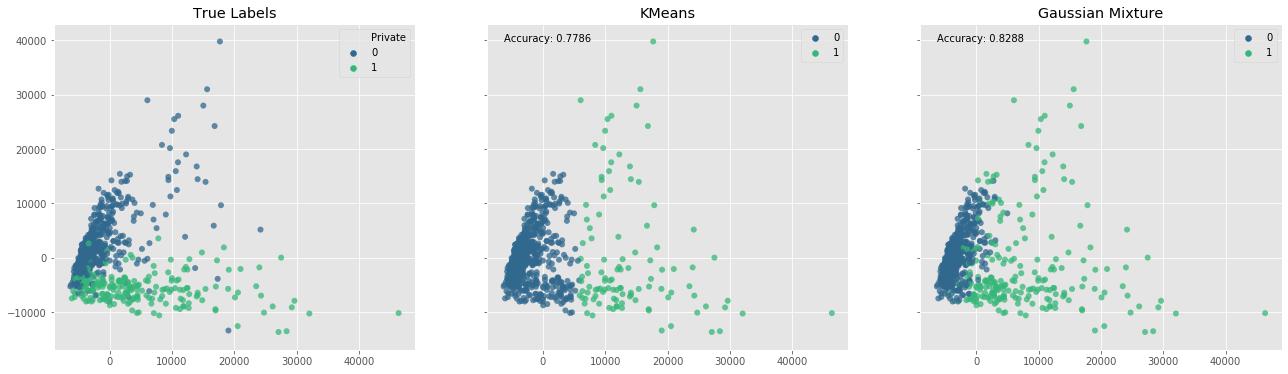

In [107]:
plot_models(college_pca, is_private, km_labels_pca, gm_labels_pca)

Accuracy won't improve with the use of PCA.

In [90]:
accuracy(is_private, km_labels_pca, gm_labels_pca)

KMeans Accuracy: 77.86%
Gaussian Mixture: 82.88%


## __TSNE__

---

TSNE will be the next applied to the data to try to obtain a better accuracy.

In [91]:
from sklearn.manifold import TSNE

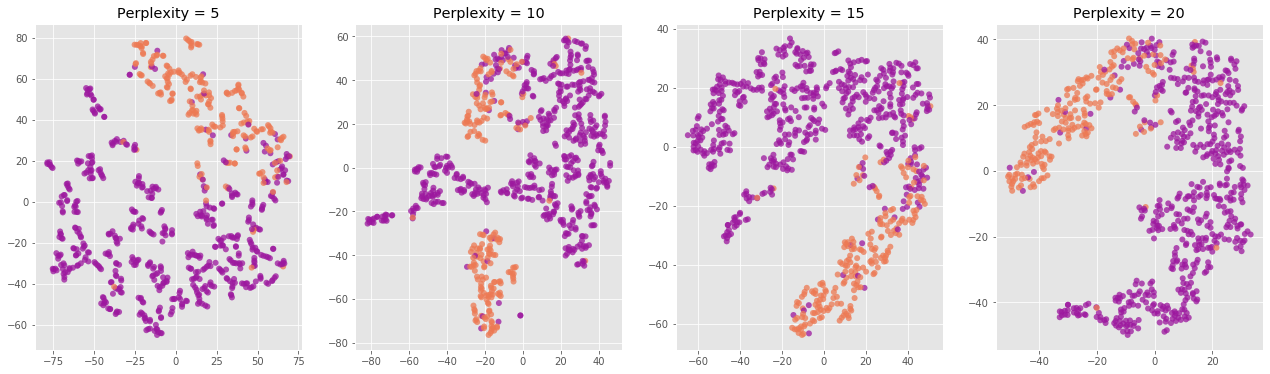

In [143]:
# To determinate a good fit, a TSNE transform is plotted with different perplexities.
fig, axes = plt.subplots(1,4, figsize=(22,6))

perps = [5,10,15,20]

for i in range(4):
    tsne_c = TSNE(n_components=2, perplexity=perps[i])
    college_tsne = tsne_c.fit_transform(college)
    sns.scatterplot(x=college_tsne[:,0], y=college_tsne[:,1], hue=is_private, palette='plasma', legend=False, alpha=0.75, linewidth=0, ax=axes[i])
    axes[i].set_title(f'Perplexity = {perps[i]}')

In [153]:
tsne_c = TSNE(n_components=2, perplexity=20)
college_tsne = tsne_c.fit_transform(college)

In [154]:
km_labels_tsne, gm_labels_tsne = fit_KM_GM(college_tsne)

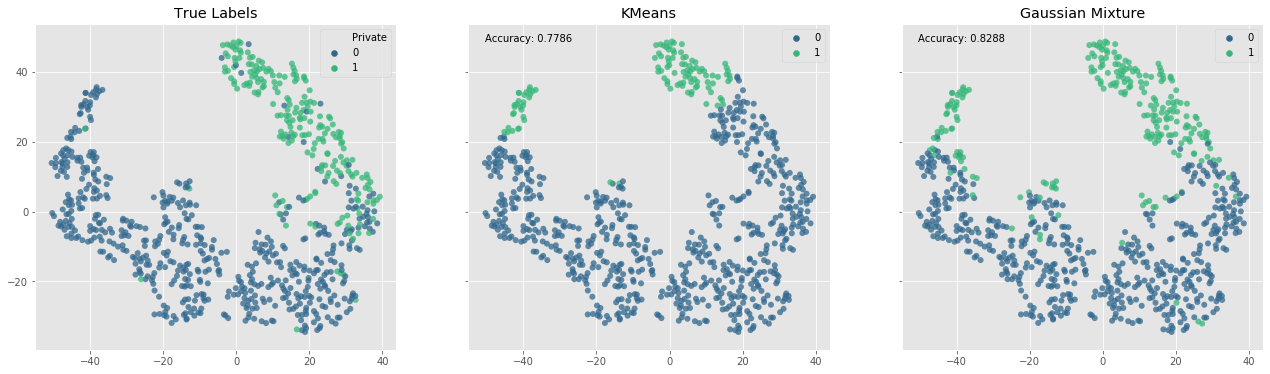

In [155]:
plot_models(college_tsne, is_private, km_labels_tsne, gm_labels_tsne)

A slightly improvement is observed in the Gaussian Mixture using TSNE.

In [121]:
accuracy(is_private, km_labels_tsne, gm_labels_tsne)

KMeans Accuracy: 77.86%
Gaussian Mixture: 83.01%


## __UMAP__

---

The last aproach will be using UMAP.

In [123]:
import umap

In [162]:
umap_r = umap.UMAP(n_components=2)
college_umap = umap_r.fit_transform(college)

In [163]:
km_labels_umap, gm_labels_umap = fit_KM_GM(college_umap)

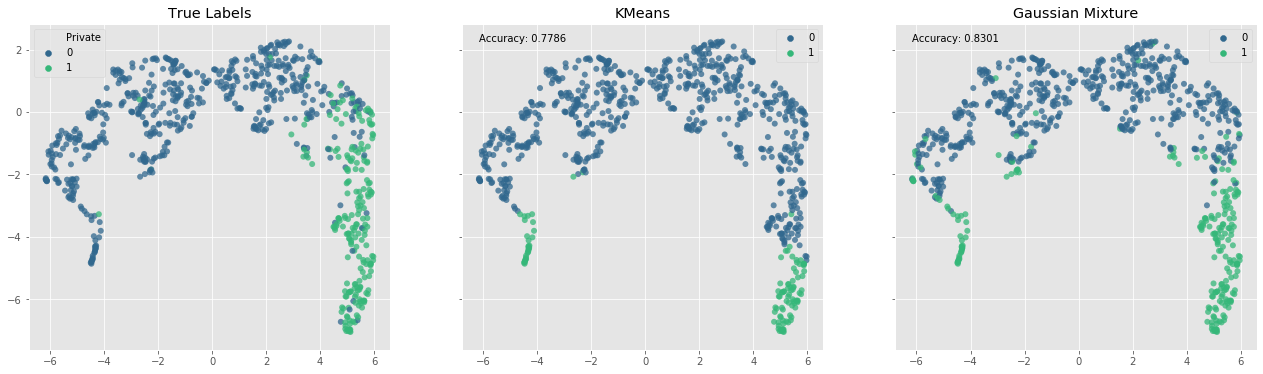

In [164]:
plot_models(college_umap, is_private, km_labels_umap, gm_labels_umap)

A slight improvement is observed when using UMAP.